# Задача 1

In [14]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [23]:
N = 1000

# Массив из пяти разных значений параметра theta.
thetas = [1, 7, 13, 100, 10000]

M = len(thetas)

# Сюда генерятся выборки
s = np.zeros((M,N))

# Генерация выборки размера N из равномерного распределения
# с параметрами из массива thetas.
for i in range(M):
    s[i] = uniform.rvs(0, thetas[i], size=N)

# Трехмерный массив для записи четырех оценок для пяти разных
# значений параметра theta.
est = np.zeros((M,4,N-1))

# Расчет оценок
for i in range(M):
    est[i][0] = np.array([(2*sum(s[i][:n]))/n for n in range(1,N)])
    est[i][1] = np.array([(n+1)*min(s[i][:n]) for n in range(1,N)])
    est[i][2] = np.array([min(s[i][:n])+max(s[i][:n]) for n in range(1,N)])
    est[i][3] = np.array([((n+1)/n)*max(s[i][:n]) for n in range(1,N)])

In [24]:
loss = np.zeros((M,4,N-1))

# Расчет функции потерь для всех четырех оценок пяти различных
# значений параметра theta
for i in range(M):
    for j in range(4):
        loss[i][j] = np.array([ ((est[i][j][n-1]-thetas[i])**2)/n for n in range(1,N) ])

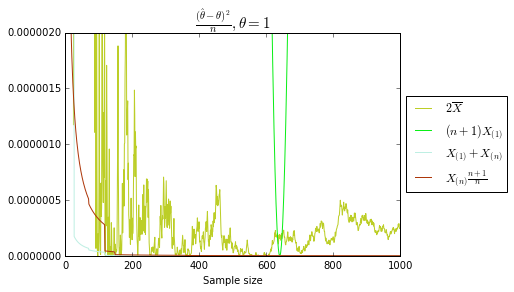

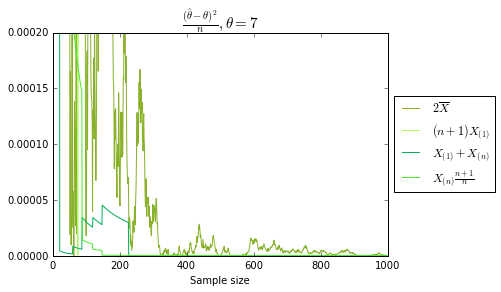

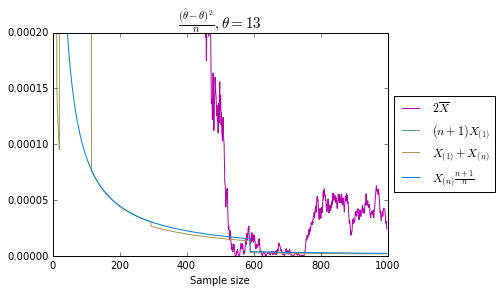

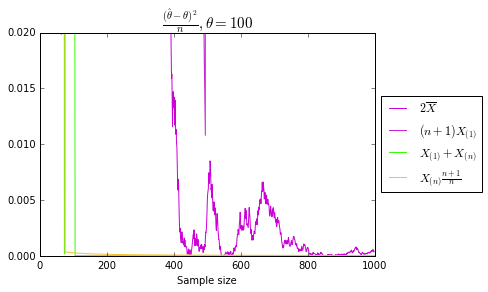

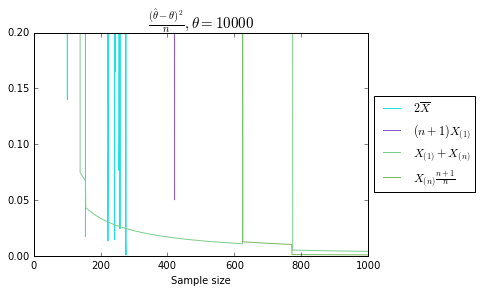

In [25]:
import random
# Функция для получения рандомного цвета
def RandCol():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

# Обозначения для графиков
labels = ['$2\overline{X}$', '$(n+1)X_{(1)}$', \
          '$X_{(1)} + X_{(n)}$', '$X_{(n)} \\frac{n+1}{n}$']

# Ограничения масштаба для трех графиков
limits = [0.000002, 0.0002, 0.0002, 0.02, 0.2]

# Построение графиков
for i in range(M):
    figure()
    for j in range(4):
        ylim(0,limits[i])
        plot(loss[i][j], color=RandCol(), label=labels[j])
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
    title('$\\frac{(\hat{\\theta} - \\theta)^2}{n}, $'+'$\\theta={}$'.format(thetas[i]), fontsize=15)
    xlabel('Sample size')
    show()

После сравнения графиков можно сделать вывод, что оценки $X_{(1)} + X_{(n)}$ и $X_{(n)}\frac{n+1}{n}$ всегда лучше остальных двух оценок параметра $\theta$ (даже при $\theta=10000$). И их квадратичная функция потерь минимальна.